## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the Ecommerce Customers csv file as a DataFrame called df.**

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


### Create a linear model plot (using seaborn's lmplot) of YearsExperience vs. Salary.

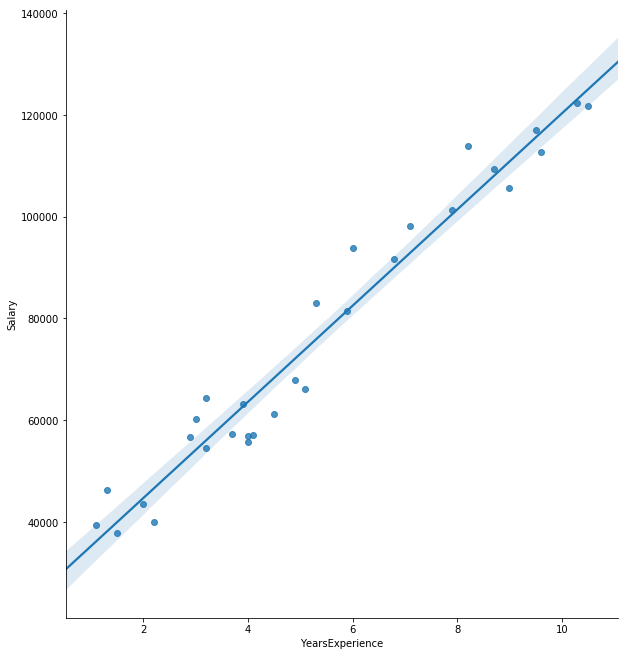

In [6]:
sns.lmplot(x="YearsExperience", y="Salary", data=df)
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Getting data ready for regression

In [7]:
X = df["YearsExperience"]
y = df["Salary"]

# Print the dimensions of X and y before reshaping
print(y.shape)
print(X.shape)

# Reshape X and y
y = y.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print(y.shape)
print(X.shape)

(30,)
(30,)
(30, 1)
(30, 1)


### Import necessary modules

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Regression

In [9]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state = 0)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

print('Coefficients:', reg_all.coef_)
print('Intercept:', reg_all.intercept_)

Coefficients: [[ 9345.94244312]]
Intercept: [ 26816.19224403]


### ** Create a scatterplot of the real test values versus the predicted values. **

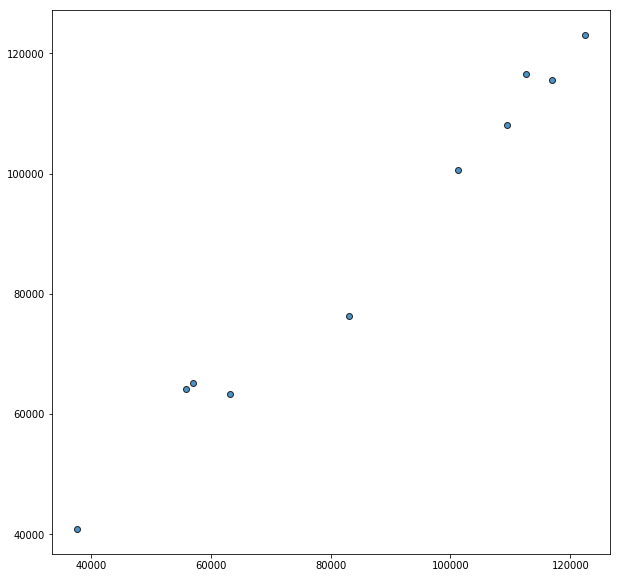

In [10]:
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0),alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(10, 10)

## Evaluating the Model

Let's evaluate our model performance by calculating variance score, R^2, MAR, MSE and RMSE

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean absolute error (MAE): %.2f"
      % mean_absolute_error(y_test, y_pred))

print("Mean squared error (MSE): %.2f"
      % mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE): {}".format(rmse))

Variance score: 0.97
R^2: 0.9749154407708353
Mean absolute error (MAE): 3426.43
Mean squared error (MSE): 21026037.33
Root Mean Squared Error (RMSE): 4585.4157204675885


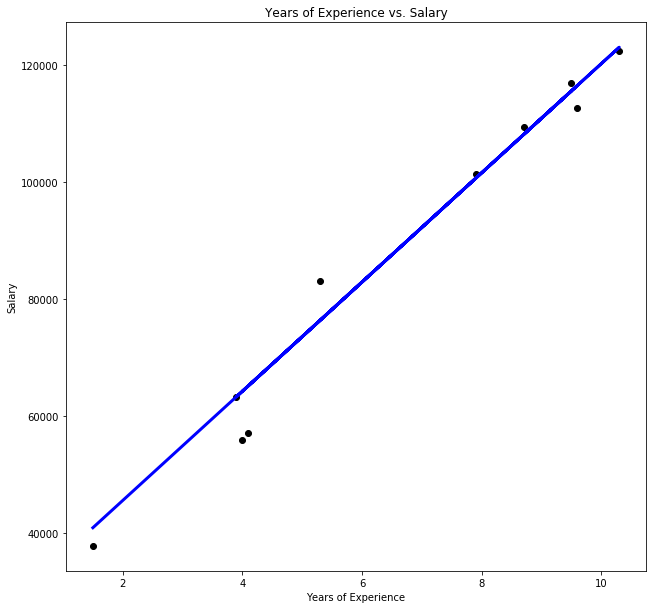

In [12]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Add the axis labels
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.title('Years of Experience vs. Salary')
plt.tight_layout()

fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.show()

### Residuals

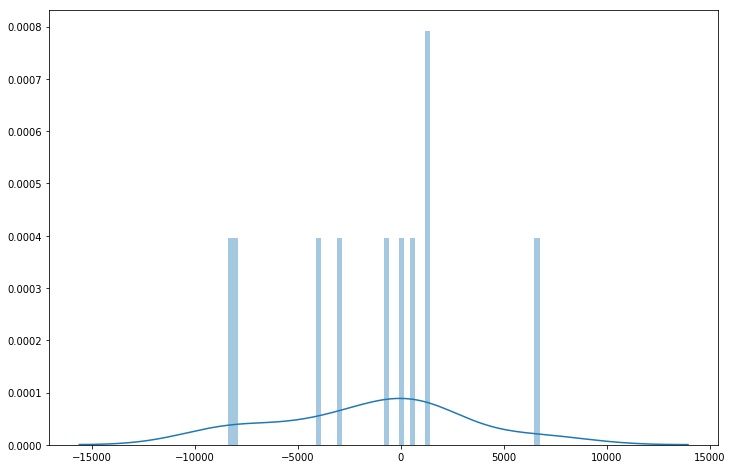

In [18]:
sns.distplot((y_test-y_pred), bins=60)
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

### Interpretations

From the Linear Regression model, for every unit increase in Years of Experience, there is an associated increase in salary by 9346 units approximately (keeping all factors constant).

### Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.333, random_state=0)

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.96169979925630522

### Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.333, random_state=0)

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.97491476371562358